<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/ViktorB9898-Lab5/ViktorB9898_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Differential Equations**
**Viktor Beck**

# **Abstract**

This report features methods to compute solutions to differential equation numerically.

#**About the code**

In [9]:
"""This program is a lab report in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Viktor Beck (vbeck@kth.se / viktor.beck98@gmail.com)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [10]:
# Load neccessary modules.
from google.colab import files

#import time
import numpy as np
#from scipy.integrate import quad
#import random

from matplotlib import pyplot as plt

# **Introduction**

This report is about numerical computation of differntial equations. There are a lot of different methods. Usually the higher the converge rate the higher the computational effort. Also, some algorithms are suited better for certain types of problems since they might be unstable for a given problem or unable to converge.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

# **Method**

### **1. Function: Time stepping for scalar initial value problem du/dt = f(u,t)**

For this we will use the explicit Euler method which is simply given by
\begin{equation}
y_{n+1}=y_n+h*f(y_n, t_n)
\end{equation}
where $h$ is the stepsize.

In [11]:
def explicit_euler(T, f, u0, dt=0.001, max_iter=30000):
    u = u0
    u_list = [u]
    t = 0
    count = 0
    while t < T:
        u = u + dt*f(u, t)
        t += dt
        u_list.append(u)
        count += 1
        if count > max_iter:
            print("Could not converge in", max_iter, "iterations")
            break
    return u_list


### **2. Function: Time stepping for a system of  initial value problems du/dt = f(u,t)**

This is basically the same as the 1D implementation but here we have u and f as vectors.

In [12]:
def time_stepping_system_ivp(T, f, u0, dt=0.001):

    N = int(T/dt)
    dim = len(u0)
    u = np.zeros((N+1, dim))
    u[0,:] = u0

    for n in range(N):
        t = n*dt
        u[n+1,:] = u[n,:] + dt*f(u[n,:], t)

    return u

# **Results**

### **1. Function: Time stepping for scalar initial value problem du/dt = f(u,t)**

In [13]:
# du/dt = -u
# exact solution: u = e^-t
def f1(u, t):
    return -u

# u = e^(t^2/2)
def f2(u, t):
    return u*t

T = 1
u0 = 1
dt = 0.001

print("After", int(1/dt), "iterations:\n")

res1 = explicit_euler(T, f1, u0, dt=dt)
err1 = abs(res1[-1]-np.exp(-T))
print("Solution of to u=f1:", res1[-1])
print("Absolute error:", err1, "\n")

res2 = explicit_euler(T, f2, u0, dt=dt)
err2 = abs(res2[-1]-np.exp(T**2/2))
print("Solution of to u=f2:", res2[-1])
print("Absolute error:", err2)

After 1000 iterations:

Solution of to u=f1: 0.36769542477096373
Absolute error: 0.0001840164004786038 

Solution of to u=f2: 1.6476230382011234
Absolute error: 0.0010982324990047587


To show the stability of the Euler method we will adapt the code a little bit:

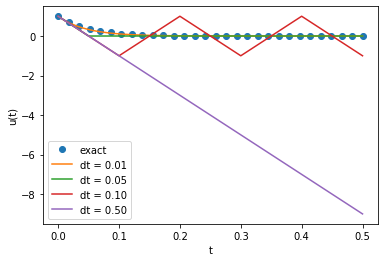

In [14]:
def f(u, t):
    return -20*u

def f_exact(t):
    return np.exp(-20*t)

T = 0.5
u0 = 1

dt_list = [0.01, 0.05, 0.1, 0.5]

# exact
t_values = np.linspace(0, T, 30)
plt.plot(t_values, f_exact(t_values), "o", label='exact')

for dt in dt_list:
    t = np.arange(0, T + dt, dt)
    u = np.zeros_like(t)
    u[0] = u0
    for n in range(0, len(t) - 1):
        u[n+1] = u[n] + dt * f(u[n], t[n])
    plt.plot(t, u, label=f'dt = {dt:.2f}')
    
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
#plt.xlim(0,0.3)
plt.show()


... one can see that the convergence is dependent on the stepsize dt since it becomes unstable for larger stepsizes.

### **2. Function: Time stepping for a system of  initial value problems du/dt = f(u,t)**

Text(0, 0.5, 'u(t)')

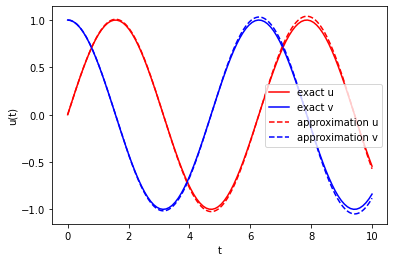

In [15]:
def f(u, t):
    return np.array([u[1],-u[0]])

def f_exact(t):
    return np.array([np.sin(t), np.cos(t)])

T = 10
u0 = np.array([0, 1])
dt = 0.01

u_approx = time_stepping_system_ivp(T, f, u0, dt)
#print(u_approx)

t_values = np.linspace(0, T, 100)
u_exact_values = f_exact(t_values)
plt.plot(t_values, u_exact_values[0,:], "r", label='exact u')
plt.plot(t_values, u_exact_values[1,:], "b", label='exact v')
plt.plot(np.arange(0, T+dt, dt), u_approx[:,0], 'r--', label='approximation u')
plt.plot(np.arange(0, T+dt, dt), u_approx[:,1], 'b--', label='approximation v')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')

To test the stability we can try higher values for the stepsize:

Text(0, 0.5, 'u(t)')

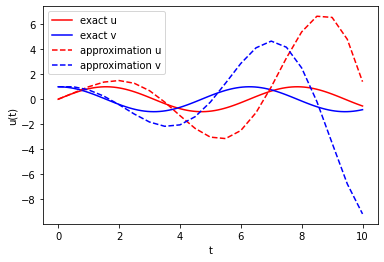

In [16]:
T = 10
u0 = np.array([0, 1])
dt = 0.5

u_approx = time_stepping_system_ivp(T, f, u0, dt)
#print(u_approx)

t_values = np.linspace(0, T, 100)
u_exact_values = f_exact(t_values)
plt.plot(t_values, u_exact_values[0,:], "r", label='exact u')
plt.plot(t_values, u_exact_values[1,:], "b", label='exact v')
plt.plot(np.arange(0, T+dt, dt), u_approx[:,0], 'r--', label='approximation u')
plt.plot(np.arange(0, T+dt, dt), u_approx[:,1], 'b--', label='approximation v')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')

# **Discussion**

The explicit Euler method seems to work fine for the given problems but especially for more complex systems it is probably better to use a more refined algorithm like Runge Kutta or at least the implicit version of the Euler method.